In [1]:
# USER: Change the path below to point to your local copy of ImageD11:

import os

home_dir = !echo $HOME
home_dir = str(home_dir[0])

# USER: You can change this location if you want

id11_code_path = os.path.join(home_dir, "Code/ImageD11")

import sys

sys.path.insert(0, id11_code_path)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

from ImageD11.sinograms import geometry
from ImageD11.sinograms.roi_iradon import run_iradon

%matplotlib inline

In [3]:
# let's define a circular sample of radius 600 um
sample_radius = 600

# the sample is perfectly aligned to the rotation axis

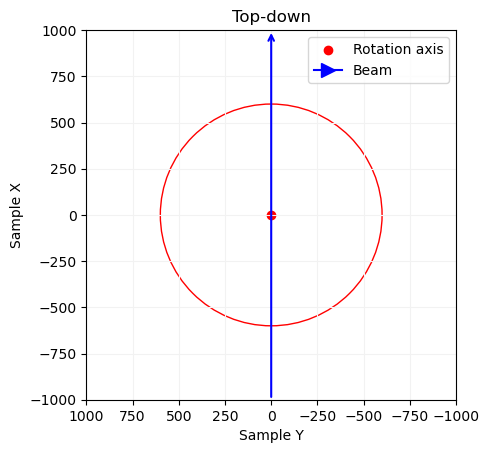

In [4]:
fig, ax = plt.subplots()
ax.scatter(0, 0, label='Rotation axis', c='r')
ax.set_xlim(1000, -1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Sample Y")
ax.set_ylabel("Sample X")

ax.set_title("Top-down")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((0, 0), sample_radius, color='r', fill=False)
plt.annotate(
    '',        # Text to display
    xy=(0, 1000),                # Arrow's head position
    xytext=(0, -1000),            # Text position
    arrowprops=dict(
        arrowstyle="->",       # Arrow style
        lw=1.5,               # Line width
        color='blue'            # Arrow color
    ),
    ha='center',               # Horizontal alignment of the text
    va='center',                # Vertical alignment of the text
)

# Create a custom legend handle for the arrow
arrow_legend = Line2D(
    [0], [0],                  # Dummy data
    color='blue',              # Arrow color
    lw=1.5,                    # Line width
    linestyle='-',             # Line style
    marker='>',                # Arrow marker
    markersize=10,             # Marker size
)

# Add the custom legend handle to the legend
handles, labels = ax.get_legend_handles_labels()
handles.append(arrow_legend)
labels.append('Beam')
# Update the legend with the new handles and labels
ax.legend(handles=handles, labels=labels)
ax.add_patch(circle1)
plt.show()

In [5]:
# we have 1 grain in our sample
# grain centre-of-mass position is [300, 400, 0] um in the sample frame

sx = 300.0
sy = 400.0
sz = 0

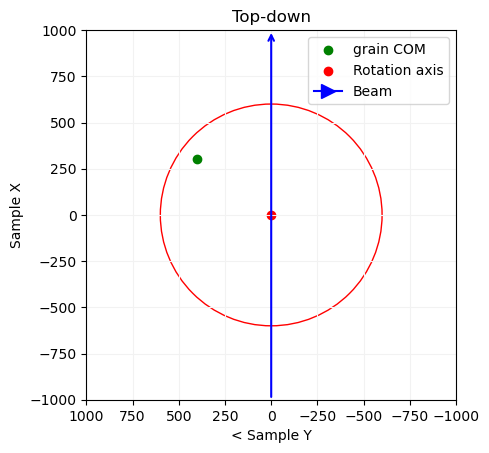

In [6]:
fig, ax = plt.subplots()
ax.scatter(sy, sx, label='grain COM', c='g')
ax.scatter(0, 0, label='Rotation axis', c='r')
ax.set_xlim(1000, -1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("< Sample Y")
ax.set_ylabel("Sample X")
ax.set_title("Top-down")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((0, 0), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.annotate(
    '',        # Text to display
    xy=(0, 1000),                # Arrow's head position
    xytext=(0, -1000),            # Text position
    arrowprops=dict(
        arrowstyle="->",       # Arrow style
        lw=1.5,               # Line width
        color='blue'            # Arrow color
    ),
    ha='center',               # Horizontal alignment of the text
    va='center',                # Vertical alignment of the text
)

# Create a custom legend handle for the arrow
arrow_legend = Line2D(
    [0], [0],                  # Dummy data
    color='blue',              # Arrow color
    lw=1.5,                    # Line width
    linestyle='-',             # Line style
    marker='>',                # Arrow marker
    markersize=10,             # Marker size
)

# Add the custom legend handle to the legend
handles, labels = ax.get_legend_handles_labels()
handles.append(arrow_legend)
labels.append('Beam')
# Update the legend with the new handles and labels
ax.legend(handles=handles, labels=labels)
plt.show()

In [7]:
# assume no misalignment between beam and rotation axis
# also assume that we're at the correct dty position
# therefore we only consider rotation at the moment

y0 = dty = 14.0*1000  # um

# then put omega = 36.87 degrees
# grain should end up at (0, 500) in the lab frame

omega = 36.87
lx, ly = geometry.sample_to_lab(sx, sy, y0=y0, dty=dty, omega=omega)
print(lx, ly)

-0.000893208512337651 499.99999999920146


In [8]:
# where is the rotation axis in the lab frame?

lx_rot, ly_rot = geometry.sample_to_lab(0, 0, y0=y0, dty=dty, omega=omega)

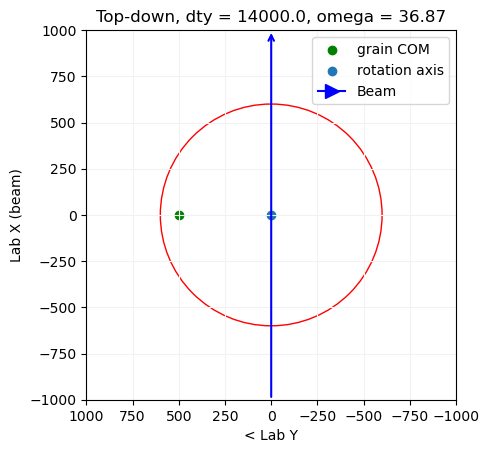

In [9]:
fig, ax = plt.subplots()
ax.scatter(ly, lx, label='grain COM', c='g')
ax.scatter(ly_rot, lx_rot, label='rotation axis')
# ax.scatter(0, 0, label='lab origin', c='k')
# ax.scatter(-y0, 0, label='sample centre', c='r')
ax.set_xlim(+1000,  -1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("< Lab Y")
ax.set_ylabel("Lab X (beam)")

ax.set_title(f"Top-down, dty = {dty}, omega = {omega}")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((ly_rot, lx_rot), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.annotate(
    '',        # Text to display
    xy=(0, 1000),                # Arrow's head position
    xytext=(0, -1000),            # Text position
    arrowprops=dict(
        arrowstyle="->",       # Arrow style
        lw=1.5,               # Line width
        color='blue'            # Arrow color
    ),
    ha='center',               # Horizontal alignment of the text
    va='center',                # Vertical alignment of the text
)

# Create a custom legend handle for the arrow
arrow_legend = Line2D(
    [0], [0],                  # Dummy data
    color='blue',              # Arrow color
    lw=1.5,                    # Line width
    linestyle='-',             # Line style
    marker='>',                # Arrow marker
    markersize=10,             # Marker size
)

# Add the custom legend handle to the legend
handles, labels = ax.get_legend_handles_labels()
handles.append(arrow_legend)
labels.append('Beam')
# Update the legend with the new handles and labels
ax.legend(handles=handles, labels=labels)
plt.show()

In [10]:
# Now let's assume an alignment problem of 65 um
# therefore y0 = -65
y0 = -65
dty = 0
# at dty = 0, the centre of the sample does not intercept the beam
# this instead happens at dty = y0

# what happens when we try to rotate the grain into the beam?
# need to rotate 90 degrees more
omega = omega + 90

# now where is the grain in the lab frame?
lx, ly = geometry.sample_to_lab(sx, sy, y0=y0, dty=dty, omega=omega)

# now where is the rotation axis in the lab frame?

lx_rot, ly_rot = geometry.sample_to_lab(0, 0, y0=y0, dty=dty, omega=omega)

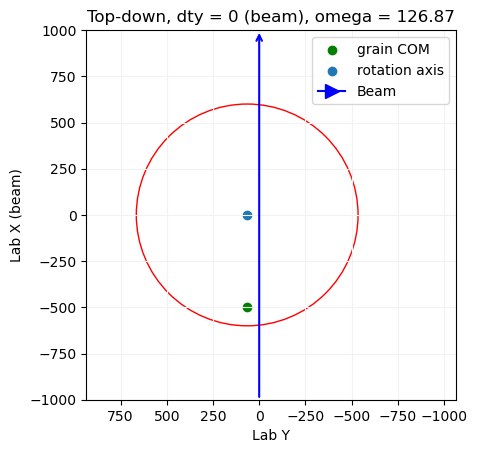

In [11]:
fig, ax = plt.subplots()
ax.scatter(ly, lx, label='grain COM', c='g')
ax.scatter(ly_rot, lx_rot, label='rotation axis')
ax.set_xlim(y0+1000,  y0-1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Lab Y")
ax.set_ylabel("Lab X (beam)")

ax.set_title(f"Top-down, dty = {dty} (beam), omega = {omega}")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((ly_rot, lx_rot), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.annotate(
    '',        # Text to display
    xy=(0, 1000),                # Arrow's head position
    xytext=(0, -1000),            # Text position
    arrowprops=dict(
        arrowstyle="->",       # Arrow style
        lw=1.5,               # Line width
        color='blue'            # Arrow color
    ),
    ha='center',               # Horizontal alignment of the text
    va='center',                # Vertical alignment of the text
)

# Create a custom legend handle for the arrow
arrow_legend = Line2D(
    [0], [0],                  # Dummy data
    color='blue',              # Arrow color
    lw=1.5,                    # Line width
    linestyle='-',             # Line style
    marker='>',                # Arrow marker
    markersize=10,             # Marker size
)

# Add the custom legend handle to the legend
handles, labels = ax.get_legend_handles_labels()
handles.append(arrow_legend)
labels.append('Beam')
# Update the legend with the new handles and labels
ax.legend(handles=handles, labels=labels)
plt.show()

In [12]:
# To get the grain into the beam at the current omega value?
# the same as getting the rotation axis into the beam
# which we know is dty = y0

dty = y0

# now where is the grain in the lab frame?
lx, ly = geometry.sample_to_lab(sx, sy, y0=y0, dty=dty, omega=omega)

# now where is the rotation axis in the lab frame?

lx_rot, ly_rot = geometry.sample_to_lab(0, 0, y0=y0, dty=dty, omega=omega)

print(dty)
print(y0)

-65
-65


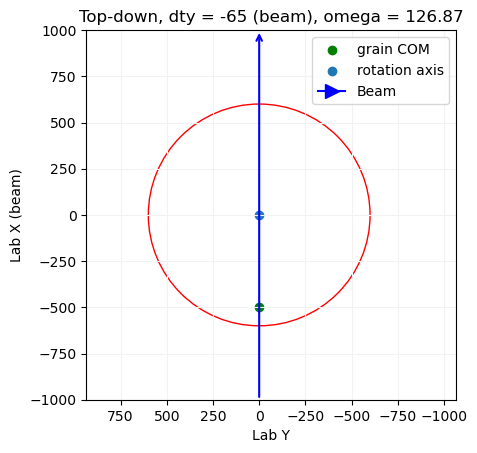

In [13]:
fig, ax = plt.subplots()
ax.scatter(ly, lx, label='grain COM', c='g')
ax.scatter(ly_rot, lx_rot, label='rotation axis')
ax.set_xlim(y0+1000,  y0-1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Lab Y")
ax.set_ylabel("Lab X (beam)")

ax.set_title(f"Top-down, dty = {dty} (beam), omega = {omega}")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((ly_rot, lx_rot), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.annotate(
    '',        # Text to display
    xy=(0, 1000),                # Arrow's head position
    xytext=(0, -1000),            # Text position
    arrowprops=dict(
        arrowstyle="->",       # Arrow style
        lw=1.5,               # Line width
        color='blue'            # Arrow color
    ),
    ha='center',               # Horizontal alignment of the text
    va='center',                # Vertical alignment of the text
)

# Create a custom legend handle for the arrow
arrow_legend = Line2D(
    [0], [0],                  # Dummy data
    color='blue',              # Arrow color
    lw=1.5,                    # Line width
    linestyle='-',             # Line style
    marker='>',                # Arrow marker
    markersize=10,             # Marker size
)

# Add the custom legend handle to the legend
handles, labels = ax.get_legend_handles_labels()
handles.append(arrow_legend)
labels.append('Beam')
# Update the legend with the new handles and labels
ax.legend(handles=handles, labels=labels)
plt.show()

In [14]:
# To get the grain into the beam at omega = 0?
# dty needs to be at the true intersection position
# then subtract sy

dty = y0 - sy
omega = 0

# now where is the grain in the lab frame?
lx, ly = geometry.sample_to_lab(sx, sy, y0=y0, dty=dty, omega=omega)

# now where is the rotation axis in the lab frame?

lx_rot, ly_rot = geometry.sample_to_lab(0, 0, y0=y0, dty=dty, omega=omega)

print(dty)
print(y0)

-465.0
-65


In [15]:
print(ly_rot)

-400.0


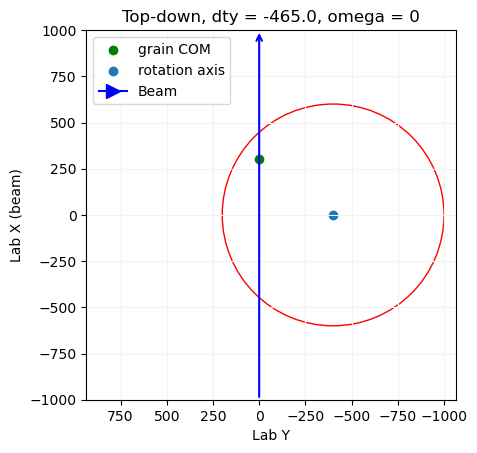

In [16]:
fig, ax = plt.subplots()
ax.scatter(ly, lx, label='grain COM', c='g')
ax.scatter(ly_rot, lx_rot, label='rotation axis')
ax.set_xlim(y0+1000,  y0-1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Lab Y")
ax.set_ylabel("Lab X (beam)")

ax.set_title(f"Top-down, dty = {dty}, omega = {omega}")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((ly_rot, lx_rot), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.annotate(
    '',        # Text to display
    xy=(0, 1000),                # Arrow's head position
    xytext=(0, -1000),            # Text position
    arrowprops=dict(
        arrowstyle="->",       # Arrow style
        lw=1.5,               # Line width
        color='blue'            # Arrow color
    ),
    ha='center',               # Horizontal alignment of the text
    va='center',                # Vertical alignment of the text
)

# Create a custom legend handle for the arrow
arrow_legend = Line2D(
    [0], [0],                  # Dummy data
    color='blue',              # Arrow color
    lw=1.5,                    # Line width
    linestyle='-',             # Line style
    marker='>',                # Arrow marker
    markersize=10,             # Marker size
)

# Add the custom legend handle to the legend
handles, labels = ax.get_legend_handles_labels()
handles.append(arrow_legend)
labels.append('Beam')
# Update the legend with the new handles and labels
ax.legend(handles=handles, labels=labels)
plt.show()

In [17]:
# check the co-ordinate systems

# to make things harder, let's assume we did a half-acquisition
ystep = 10  # microns
ymin = -750
ymax = +100

yrange = ymax - ymin
ny = int(yrange // ystep) + 1
ybincens = np.linspace(ymin, ymax, ny)

In [18]:
si, sj = geometry.sample_to_step(sx, sy, ystep=ystep)
ri, rj = geometry.sample_to_recon(sx, sy, ystep=ystep, recon_shape=(200, 200))

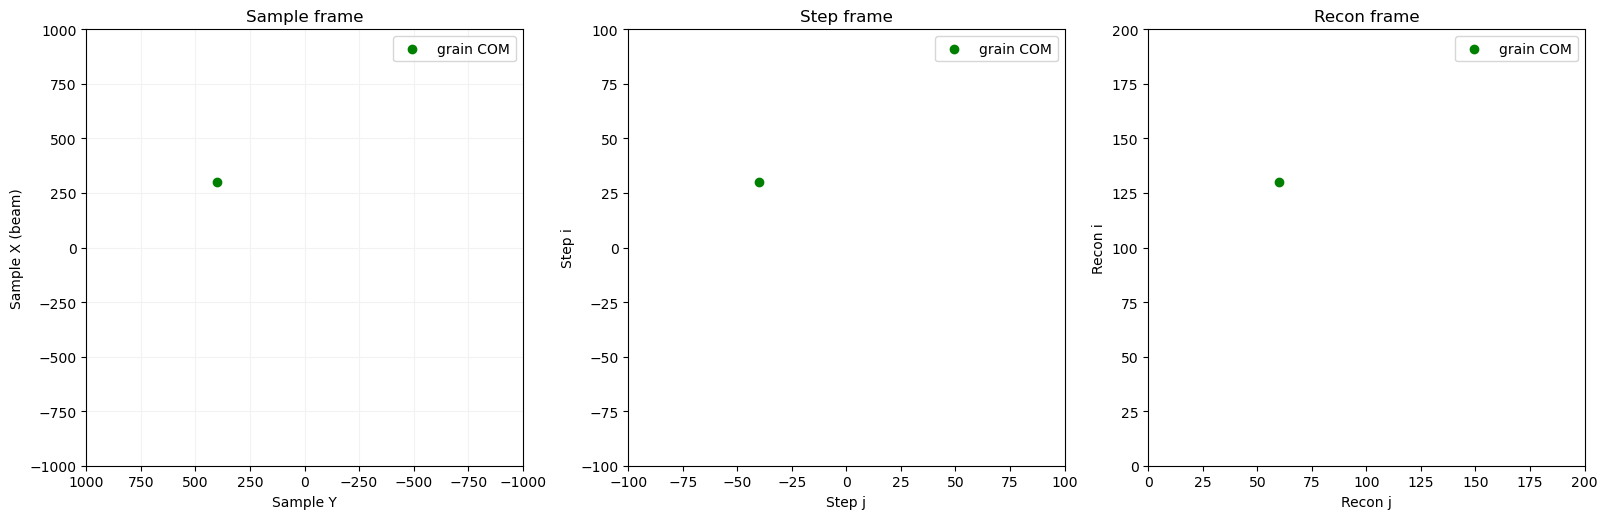

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), layout="constrained")
axs[0].scatter(sy, sx, label='grain COM', c='g')
axs[0].set_xlim(1000, -1000)
axs[0].set_ylim(-1000, 1000)
axs[0].set_aspect(1)
axs[0].set_xlabel("Sample Y")
axs[0].set_ylabel("Sample X (beam)")
axs[0].legend()
axs[0].set_title("Sample frame")
axs[0].grid(axis='x', color='0.95')
axs[0].grid(axis='y', color='0.95')

axs[1].scatter(sj, si, label='grain COM', c='g')
axs[1].set_xlim(-1000/ystep, 1000/ystep)
axs[1].set_ylim(-1000/ystep, 1000/ystep)
axs[1].set_aspect(1)
axs[1].set_xlabel("Step j")
axs[1].set_ylabel("Step i")
axs[1].legend()
axs[1].set_title("Step frame")


axs[2].scatter(rj, ri, label='grain COM', c='g')
axs[2].set_xlim(0, 200)
axs[2].set_ylim(0, 200)
axs[2].set_aspect(1)
axs[2].set_xlabel("Recon j")
axs[2].set_ylabel("Recon i")
axs[2].legend()
axs[2].set_title("Recon frame")

plt.show()

In [20]:
# how does the grain's sinogram look?
# omega is counter-clockwise (CCW) when looking down at the diffractometer

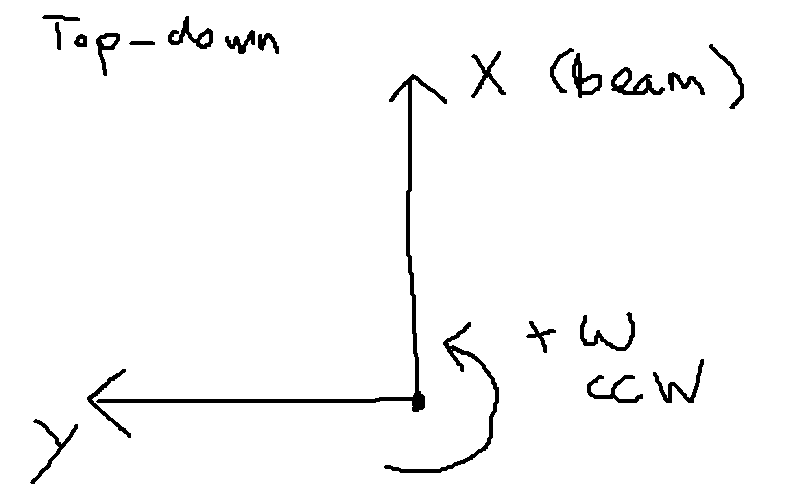

In [21]:
# This means the sinogram should start positive and begin decreasing as we increase omega

In [22]:
y0 = ( 14 * 1000 ) # um
# we thought y0 was 14 mm which is what we scanned across
# in a weird sorta-half-acquisition way

ystep = 10  # microns
ymin = 14 * 1000 - 750
ymax = 14 * 1000 + 100

yrange = ymax - ymin
ny = int(yrange // ystep) + 1
ybincens = np.linspace(ymin, ymax, ny)

omega = np.arange(0, 361, 1)  # 1 degree step

sx = 530.6
sy = -530

dty = geometry.dty_values_grain_in_beam(sx, sy, y0, omega)
dtyi = geometry.dty_to_dtyi(dty, ystep, ybincens[0])

# construct a sinogram
sino = np.zeros((ny, len(omega)), dtype=float)

for i in range(sino.shape[0]):  # ny
    for j in range(sino.shape[1]):  # omega
        # use dtyi_calc as a lookup table from omega index
        this_dtyi = dtyi[j]
        sino[i, j] = 1/(50*np.cbrt((np.abs(i - this_dtyi)))+0.01)

shift, pad = geometry.sino_shift_and_pad(y0, ny, ymin, ystep)
print(shift, pad)
recon = run_iradon(sino, omega, pad=pad, shift=shift)

-32.0 65


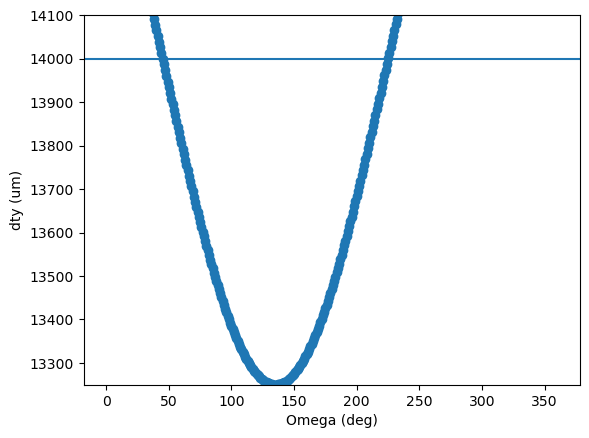

In [23]:
fig, ax = plt.subplots()
ax.scatter(omega, dty)
ax.set_xlabel("Omega (deg)")
ax.set_ylabel("dty (um)")
ax.set_ylim(ybincens.min(), ybincens.max())
plt.axhline(y0)

plt.show()

In [24]:
# can we get the sample position from the dty curve?
sx_calc, sy_calc, y0_calc = geometry.sx_sy_y0_from_dty_omega(dty, omega)
print(sx_calc, sy_calc, y0_calc)
print(sx, sy, y0)

530.6000000000004 -530.0 14000.0
530.6 -530 14000


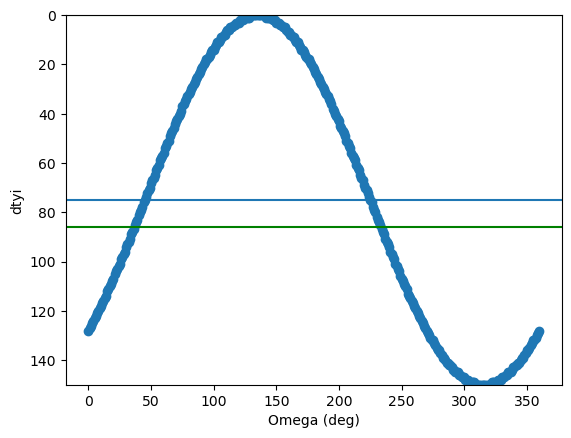

In [25]:
# let's investigate dtyi

fig, ax = plt.subplots()
ax.scatter(omega, dtyi)
ax.set_xlabel("Omega (deg)")
ax.set_ylabel("dtyi")
ax.set_ylim(dtyi.max(), dtyi.min())

plt.axhline(geometry.dty_to_dtyi(y0, ystep, ybincens[0]))
plt.axhline(0, c='g')
plt.axhline(ny, c='g')

plt.show()

In [26]:
dtyi.min()
dtyi.max()

150

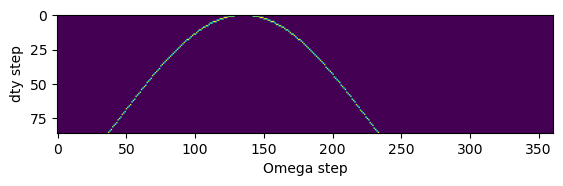

In [27]:
fig, ax = plt.subplots()
ax.imshow(sino, aspect=1)
ax.set_xlabel("Omega step")
ax.set_ylabel("dty step")
plt.show()

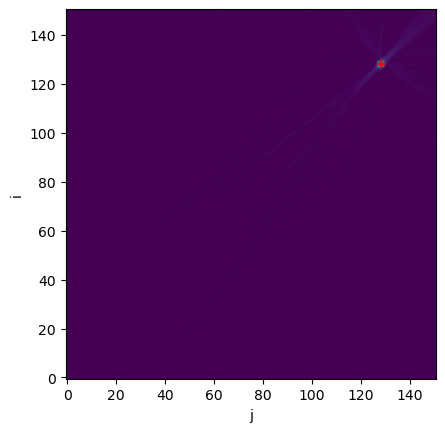

In [28]:
fig, ax = plt.subplots()
ax.imshow(recon, vmin=0, origin="lower")
ax.scatter(*geometry.sample_to_recon(sx, sy, recon.shape, ystep), marker='+', c='r')
ax.set_ylabel("i")
ax.set_xlabel("j")
plt.show()

In [29]:
# can we recover the sample position from the reconstruction?
print(geometry.fit_sample_position_from_recon(recon, ystep))
print(sx, sy)

(530.0, -530.0)
530.6 -530


In [30]:
# does the reconstruction by default match the step space?
print(recon.shape)
print(np.sqrt(len(geometry.step_grid_from_ybincens(ybincens, ystep, 1, y0))))

(151, 151)
151.0


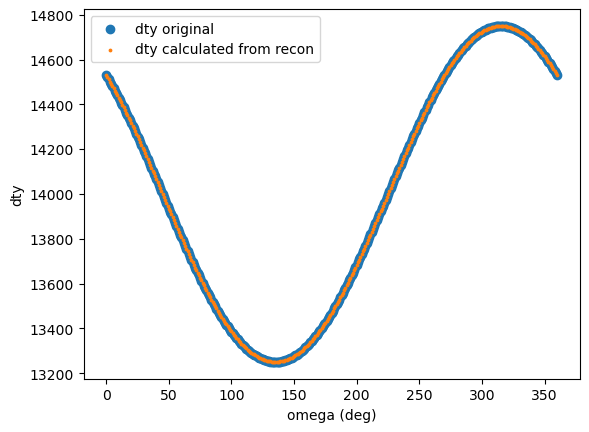

In [31]:
# convert reconstruction coordinates to (sx, sy)
# then calulate dty from that

ri, rj = np.array(np.where(recon == recon.max())).flatten()

dty_calc = geometry.recon_omega_to_dty(ri, rj, omega, y0, recon.shape, ystep)

fig, ax = plt.subplots()
ax.scatter(omega, dty, label='dty original')
ax.scatter(omega, dty_calc, label='dty calculated from recon', s=3)
ax.legend()
ax.set_xlabel('omega (deg)')
ax.set_ylabel('dty')
plt.show()

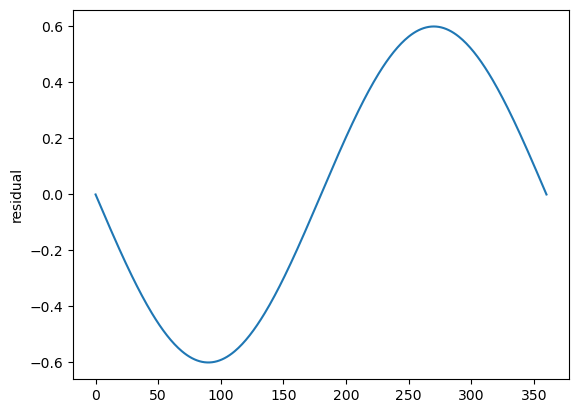

In [32]:
# plot residual

fig, ax = plt.subplots()
ax.plot(dty - dty_calc)
ax.set_ylabel('residual')
plt.show()

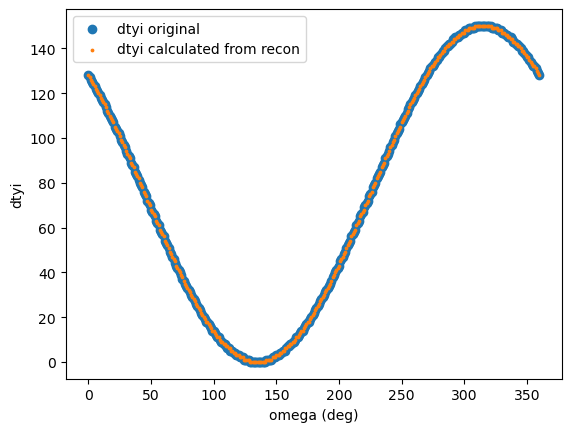

In [33]:
dtyi_desired = geometry.dty_to_dtyi(dty, ystep, ybincens[0])
dtyi_calc = geometry.recon_omega_to_dtyi(ri, rj, omega, y0, recon.shape, ystep, ybincens[0])

fig, ax = plt.subplots()
ax.scatter(omega, dtyi_desired, label='dtyi original')
ax.scatter(omega, dtyi_calc, label='dtyi calculated from recon', s=3)
ax.legend()
ax.set_xlabel('omega (deg)')
ax.set_ylabel('dtyi')
plt.show()

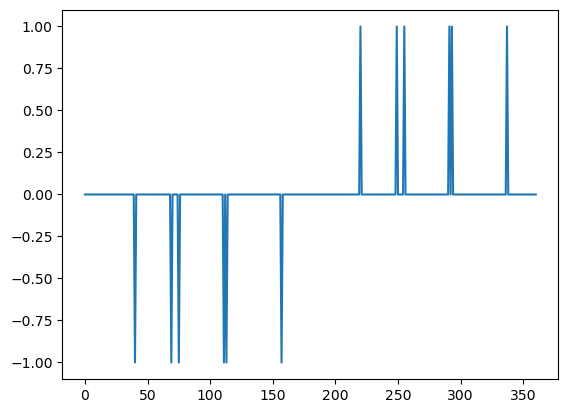

In [34]:
# plot residual

fig, ax = plt.subplots()
ax.plot(dtyi_desired - dtyi_calc)
plt.show()